In [21]:

from packaging import version
import sklearn
from sklearn.decomposition import PCA
import random
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np 
#from pathlib import Path
import seaborn as sns

#Model imports 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


 

Some Exploratory Data Analysis:

In [22]:
data = pd.read_csv("mldata_0003205460.csv")
data.head()

,Unnamed: 0,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35
0,0,0,2.260446,1.395408,-0.359638,-4.425557,-0.116094,1.406127,-1.063222,1.679877,...,0.496827,-1.315450,-0.406156,1.227813,-1.969267,-1.289377,-2.903900,0.215244,0.164229,0.592466
1,1,0,-2.335002,-2.614194,1.274954,8.070422,0.885123,-2.830203,0.761295,0.060832,...,-0.519794,-0.495219,-4.009435,-1.291287,8.685689,0.606391,-8.615776,-1.782142,-2.451340,1.082986
2,2,1,-6.302470,3.476822,1.659859,3.042943,-0.027612,3.342234,-1.853694,-1.360087,...,0.733021,0.437512,2.105797,2.604733,-0.993123,-1.715210,0.053929,2.355465,3.130573,0.826093
3,3,1,-3.278892,0.655965,2.545981,2.592651,1.335697,3.856370,2.242878,3.731638,...,-1.779708,-0.160388,2.409813,4.542493,5.816350,1.855730,-3.740699,-1.327518,2.397178,1.663368
4,4,1,-0.926192,1.050432,-0.215919,-0.651200,1.205937,-2.478880,-0.263688,4.363578,...,0.382069,0.524706,2.659977,-1.336389,-3.959147,-0.437617,-4.188690,-0.414930,7.622485,0.730065


In [23]:
data.describe()

,Unnamed: 0,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,549.500000,0.496364,0.130172,0.040200,0.022139,0.719607,0.131716,0.737812,0.128561,0.096589,...,0.057855,0.100204,0.521427,0.501630,-0.187338,0.088295,-0.251872,-0.034407,0.648158,0.136484
std,317.686953,0.500214,3.121634,2.886318,2.524879,6.693818,0.981729,2.767769,0.969290,2.672225,...,1.005100,1.020059,2.968800,2.717023,6.616552,0.990871,7.621399,2.966153,2.796502,0.985270
min,0.000000,0.000000,-11.303077,-10.636153,-8.760823,-20.967806,-3.001000,-9.507238,-2.947366,-8.971762,...,-4.171398,-2.920526,-9.481596,-8.366755,-22.458791,-2.718045,-28.499008,-10.565767,-8.250743,-3.150165
25%,274.750000,0.000000,-1.977782,-1.768341,-1.658166,-3.598696,-0.561937,-1.117435,-0.485697,-1.728340,...,-0.633223,-0.593150,-1.378811,-1.257406,-4.401005,-0.526832,-5.136587,-2.009944,-1.080898,-0.571922
50%,549.500000,0.000000,0.129162,0.014361,0.066880,0.504387,0.148921,0.769031,0.145264,0.192233,...,0.046651,0.075953,0.506414,0.496880,-0.392259,0.132776,-0.270171,-0.144365,0.546620,0.149843
75%,824.250000,1.000000,2.307074,2.024013,1.774208,5.087461,0.806856,2.576067,0.752985,1.830840,...,0.668529,0.756176,2.398178,2.365185,4.157297,0.714862,4.442483,1.995523,2.401884,0.811838
max,1099.000000,1.000000,10.070292,7.996722,9.394472,24.429006,3.203084,10.190523,3.721088,8.158626,...,3.525093,3.640228,9.387325,12.664036,20.921671,3.120644,23.041050,9.852854,9.751662,3.956873


In [24]:
data.info()
missing_values = data.isnull().any().any()
if missing_values:
    print("There are missing values")
else:
    print("No misisng values")

del missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1100 non-null   int64  
 1   label       1100 non-null   int64  
 2   feature_1   1100 non-null   float64
 3   feature_2   1100 non-null   float64
 4   feature_3   1100 non-null   float64
 5   feature_4   1100 non-null   float64
 6   feature_5   1100 non-null   float64
 7   feature_6   1100 non-null   float64
 8   feature_7   1100 non-null   float64
 9   feature_8   1100 non-null   float64
 10  feature_9   1100 non-null   float64
 11  feature_10  1100 non-null   float64
 12  feature_11  1100 non-null   float64
 13  feature_12  1100 non-null   float64
 14  feature_13  1100 non-null   float64
 15  feature_14  1100 non-null   float64
 16  feature_15  1100 non-null   float64
 17  feature_16  1100 non-null   float64
 18  feature_17  1100 non-null   float64
 19  feature_18  1100 non-null  

To get a feel for the distributions of the features the following plots are created, they are histograms showing the frequency of different observations for 5 randomly selected features. 

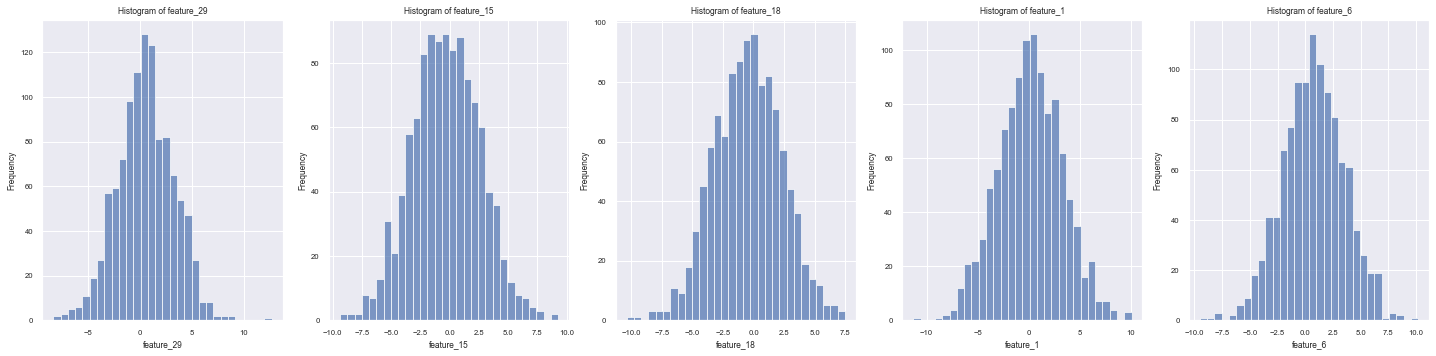

In [25]:
data1 = data.drop(columns=[data.columns[0], 'label'])
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

selected_features = random.sample(list(data1.columns), 5)

for i, feature in enumerate(selected_features):
    axes[i].hist(data1[feature], bins=30, alpha=0.7)
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

del selected_features, fig, axes

We notice that the features appear to have similar expressions in terms of both shape and frequency. Moreover, data appears to be fairly normal, to check this we perform some analysis of the skewness and kurtosis of the features. 

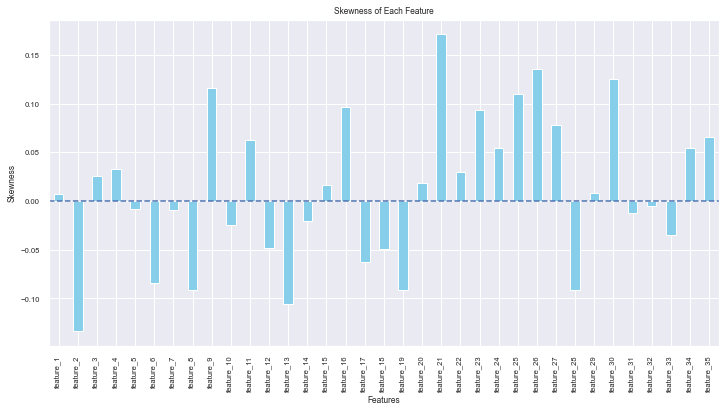

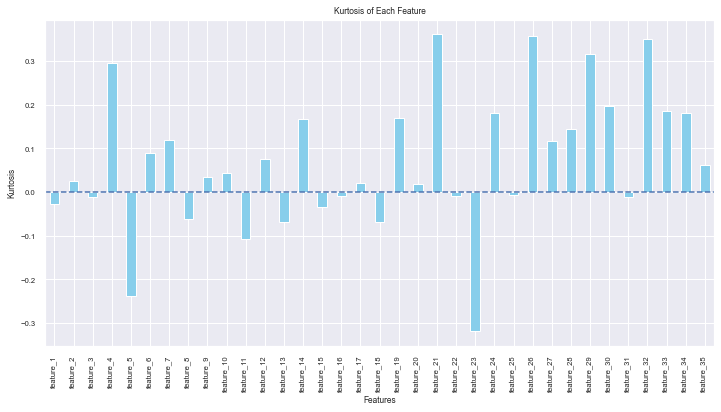

In [26]:
data1 = data.drop(columns=[data.columns[0], 'label'])

skewness = data1.skew()
kurtosis = data1.kurt()

# Plot the skewness
plt.figure(figsize=(12, 6))
skewness.plot(kind='bar', color='skyblue')
plt.title('Skewness of Each Feature')
plt.xlabel('Features')
plt.ylabel('Skewness')
plt.axhline(y=0, color='b', linestyle='--') # Add a blue dashed line at y=0
plt.xticks(rotation=90)
plt.show()

# Plot the kurtosis
plt.figure(figsize=(12, 6))
kurtosis.plot(kind='bar', color='skyblue')
plt.title('Kurtosis of Each Feature')
plt.xlabel('Features')
plt.ylabel('Kurtosis')
plt.axhline(y=0, color='b', linestyle='--')  # Add a blue dashed line at y=0
plt.xticks(rotation=90)
plt.show()

 

All features have a skewness value close to zero suggesting they have fairly symmetric distributions. The same can be infered from the kurtosis which conveys a metokurtic distribution for all features. All in all the data is farily normal as suggested by the histograms hence there is no need to apply a transformation.   

We now investigate the correlation (pearson) between features.

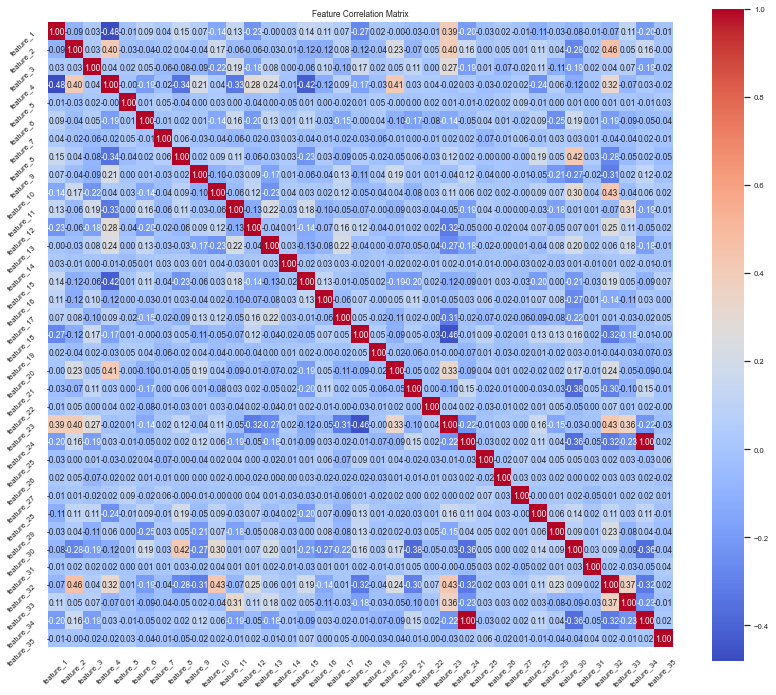

In [27]:

numerical_features = data1.select_dtypes(include=[np.number])

correlation_matrix = numerical_features.corr()

plt.figure(figsize=(14, 12))
sns.set(font_scale=0.7)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

plt.title('Feature Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()

This conveys that in general correlation between features is low however there is some multicolinearity with some features having a correlation of around 0.4 (-0.4). Interestingly feature 34 and 24 have perfect correlation. 

Machine Learning phase 

Apply PCA:

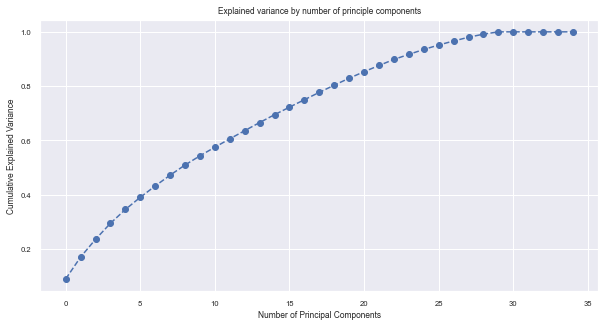

[0.08926853 0.17001472 0.23540146 0.29439866 0.34527057 0.39024821
 0.43193157 0.47189374 0.50920944 0.54318942 0.57484346 0.60575294
 0.63587574 0.66574885 0.69469361 0.72249071 0.7499178  0.77704722
 0.80348286 0.82907863 0.85317799 0.87601612 0.89839499 0.91697583
 0.93506503 0.95155926 0.96626637 0.98014426 0.99143731 1.
 1.         1.         1.         1.         1.        ]
Number of components to explain 95% variance: 26


In [28]:
#These variables X and y will now be used for rest of project for the data
X = data.drop(columns=[data.columns[0], 'label'])
y = data['label']

# Scale the features 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
principal_components = pca.fit_transform(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Plot the cumulative explained variance
plt.figure(figsize=(10, 5))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained variance by number of principle components')
plt.grid(True)
plt.show()
print(cumulative_variance)
n_components_95 = sum(cumulative_variance < 0.95) + 1 
print(f"Number of components to explain 95% variance:", n_components_95)


It can be seen that many principle components are required to explain a large proportion of the variance of the data. For example to explain 95% we still need 26 components (dimensions) suggesting it might not be useful to train the whole model on dimensionally reduced data. However, given the last 5 principle components explain a negligible proportion of the variance of the data they should be removed. 

Therefore the model will be trained on dimensionally reduced data with number of principle components as a hyperparamter to further investigate the usefulness of PCA. 

Now look at a plot of the data along the 3 principle components to get an idea of the structure. 

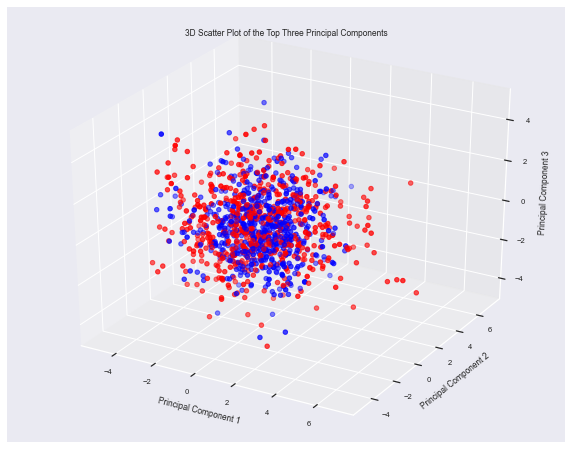

In [29]:
pc_df = pd.DataFrame(data=principal_components[:, :3], columns=['PC1', 'PC2', 'PC3'])
pc_df['Label'] = y

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colours = np.where(pc_df['Label'] == 1, 'red', 'blue')  # red for label 1, blue for label 0
scatter = ax.scatter(pc_df['PC1'], pc_df['PC2'], pc_df['PC3'], c=colours)


ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Scatter Plot of the Top Three Principal Components')
plt.show()

While it is true that the first three components only explain 23.5% of the variance in the data and this scatter plot is therefore not expressive of the whole data it does suggest that the data is not linearly seperable - no clear hyperplane can be gound to at least partially classify the data points. This may be a problem for the logistic regression model as it less effective in such situations. For this reason using polynomial features will probably be useful. 

The Model:

The model uses GridSearchCV as part of Sklearn to find the best model configuration (regularisation strength 'C' of the logistic regression (between 0.0001 and 10000) and the number of principle components used) based on cross-validation performance. The model uses 5-fold cross validation. 

It uses 'Elasticnet' regularisation (both l1 and l2) for better generalisation and to combat the multicolinearity observed earlier. Solver is 'Saga' so that elasticnet can be used. 

This initial model does not use polynomial features due to the enormous increase in time complexity. 

It also stores the best accuracy from the cross-validation scores for each principle component in order to plot this information and see which number gives the best performance.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pca_components = range(1, X_train.shape[1])  
mean_scores = []

best_score = 0
optimal_components = 0

#Go manually through the number of principle components used and find accuracy for each
for n_components in pca_components:

    # Define the pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n_components)),
        ('logreg', LogisticRegression(max_iter=10000, penalty='elasticnet', solver='saga', l1_ratio=0.5))
    ])

    # Parameter grid includes only regularisation strength C of LogR
    param_grid = {
        'logreg__C': np.logspace(-4, 4, 10),  
    }

    # Grid search
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)
    grid_search.fit(X_train, y_train)

    # Store the average of the best score    
    current_score = grid_search.best_score_
    mean_scores.append(current_score)
    
    if current_score > best_score:
        best_score = current_score
        optimal_components = n_components

# Best model parameters and score

print("Best overall cross-validation score: {:.2f}".format(best_score))
print("Optimal number of principal components: ", optimal_components)
print("Best parameters:", grid_search.best_params_)

# Evaluate on the test set
test_score = grid_search.score(X_test, y_test)
print("Test set score: {:.2f}".format(test_score))

del X_train, X_test, y_train, y_test, test_score

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each

This initial model without polynomial features gives a fairly good accuracy score. 

The regularisation parameter 'C' of the logistic regression is high hence a lower level of regularisation was found to be optimal by GridSearch. 

Moreover, as expected the number of principle components used was 30 as the final 5 had negligible variance explained. The following plot conveys model performance against number of principle components used. 

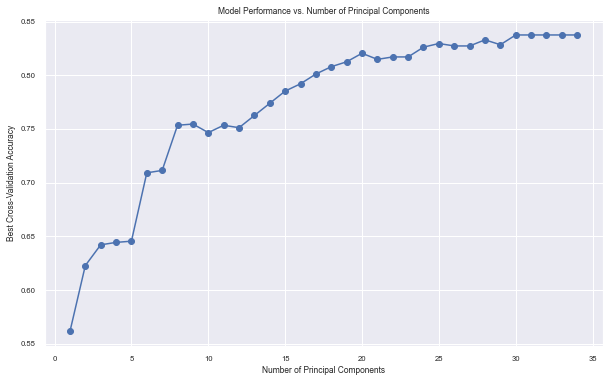

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(pca_components, mean_scores, marker='o', linestyle='-', color='b')
plt.title('Model Performance vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Best Cross-Validation Accuracy')
plt.grid(True)
plt.show()

This plot reveals that using dimensionally reduced data for the model is not useful. Removing 5 dimensions may give a slightly better performance but it is negligible. 

Therefore the final model will be with polynomial features on the original data. 

It will use the same set-up as before, this time however GridSearch will optimise parameters for regularisation strength 'C' of the logistic regression and the degree of the polynomial features (1 or 2). 

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a pipeline that includes scaling, logistic regression and polynomial degree
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('logreg', LogisticRegression(max_iter=10000, solver='saga', penalty='elasticnet', l1_ratio=0.5))
])

# Define the parameter grid (C + degree of polynomial features)
param_grid = {
    'poly__degree': [1, 2],  # degrees of polynomial features
    'logreg__C': np.logspace(-4, 4, 10)  # regularization strengths
}

#GridSearch
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best model parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Evaluate on the test set
test_score = grid_search.score(X_test, y_test)
print("Test set score: {:.2f}".format(test_score))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'logreg__C': 0.046415888336127774, 'poly__degree': 2}
Best cross-validation score: 0.96
Test set score: 0.94


Conclusions:

We see that using polynomial features greatly improves the model performance, this accuracy of 94% on test score is now satisfactory. 

The optimal parameters found by GridSearch are a regularisation strength 'C' of LogR of 0.046415888336127774.
Furthermore, the optimal degree of polynomial features was 2. 
The l1 ratio was fixed to 0.5 to give an even mix of l1 (Lasso) and l2 (Ridge) regularisation. 

In [33]:
#Store the best model
best_model = grid_search.best_estimator_

print(best_model)

Pipeline(steps=[('scaler', StandardScaler()), ('poly', PolynomialFeatures()),
                ('logreg',
                 LogisticRegression(C=0.046415888336127774, l1_ratio=0.5,
                                    max_iter=10000, penalty='elasticnet',
                                    solver='saga'))])


Run the model on the unlabled data and store it.

In [34]:
X_test_unlabled = pd.read_csv("mldata_0003205460.TEST_FEATURES.csv")
X_test_unlabled = X_test_unlabled.drop(X_test_unlabled.columns[0], axis=1)

#Predict the labels with the final model
predictions = best_model.predict(X_test_unlabled)

predicted_labels = pd.DataFrame(predictions, columns=['Predicted_Label'])

predicted_labels.to_csv('predicted_labels.txt', header=False, index=False)
